In [1]:
# import fx for wrangling telco data
from acquire_prep import *

In [2]:
# display
prep_telco().head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
senior_citizen,0,0,0,1,1
tenure,9,9,4,13,3
monthly_charges,65.6,59.9,73.9,98.0,83.9
total_charges,593.3,542.4,280.85,1237.85,267.4
gender_encoded,1,0,0,0,1
partner_encoded,1,0,0,1,1
dependents_encoded,1,0,0,0,0
phone_service_encoded,1,1,1,1,1
paperless_billing_encoded,1,0,1,1,1


In [3]:
# measure rows and column 
prep_telco().shape

(7043, 32)

In [4]:
# create manipulation object of telco dataframe
df = prep_telco()

In [5]:
# assess data types
df.dtypes

customer_id                               object
senior_citizen                             int64
tenure                                     int64
monthly_charges                          float64
total_charges                             object
gender_encoded                             int64
partner_encoded                            int64
dependents_encoded                         int64
phone_service_encoded                      int64
paperless_billing_encoded                  int64
churn_encoded                              int64
multiple_lines_No phone service            uint8
multiple_lines_Yes                         uint8
online_security_No internet service        uint8
online_security_Yes                        uint8
online_backup_No internet service          uint8
online_backup_Yes                          uint8
device_protection_No internet service      uint8
device_protection_Yes                      uint8
tech_support_No internet service           uint8
tech_support_Yes    

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire_prep

import seaborn as sns

from acquire_prep import prep_telco
from acquire_prep import my_train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [7]:
df['churn_encoded'].value_counts() #baseline count of churn

0    5174
1    1869
Name: churn_encoded, dtype: int64

In [8]:
1869/(1869+5163) # % of baseline churn prediction

0.26578498293515357

## First model with all encoded and numeric data types

target: churn_encoded

In [9]:
#my_train_test_split(df, target='churn_encoded')
train, validate, test = my_train_test_split(df,'churn_encoded')
print(train.shape)
print(validate.shape)
print(test.shape)

(4225, 32)
(1409, 32)
(1409, 32)


In [10]:
# this split removes further objects from train,val, test for logistic regression error avoidance
x_train = train.drop(columns=['churn_encoded','customer_id']).dropna()
y_train = train.churn_encoded.dropna()

x_val = validate.drop(columns=['churn_encoded','customer_id']).dropna()
y_val = validate.churn_encoded

x_test = test.drop(columns=['churn_encoded','customer_id']).dropna()
y_test = test.churn_encoded

In [11]:
reg_o = LogisticRegression()

In [12]:
reg_o.fit(x_train, y_train)

ValueError: could not convert string to float: ''

In [ ]:
# below is check for non numeric in total charges

#non_numeric_values = df['total_charges'][pd.to_numeric(df['total_charges'], errors='coerce').isna()]
#print(non_numeric_values)

In [ ]:
y_pred = reg_o.predict(x_train)

In [ ]:
y_pred_proba = reg_o.predict_proba(x_train)

In [ ]:
print('Accuracy of Log. Reg. object on train set: {:.3f}'
     .format(reg_o.score(x_train, y_train)))

print(classification_report(y_train, y_pred))

evaluate on validate

In [ ]:
y_pred = reg_o.predict(x_val)

In [ ]:
y_pred_proba = reg_o.predict_proba(x_val)

In [ ]:
print('Accuracy of Log. Reg. object on train set: {:.3f}'
     .format(reg_o.score(x_val, y_val)))

In [ ]:
print(classification_report(y_val, y_pred))

evaluate on test

In [ ]:
y_pred = reg_o.predict(x_test)

In [ ]:
y_pred_proba = reg_o.predict_proba(x_test)

In [ ]:
print('Accuracy of Log. Reg. object on train set: {:.3f}'
     .format(reg_o.score(x_test, y_test)))

In [ ]:
print(classification_report(y_test, y_pred))

## New model for assessing relationship of contract type to churn

H<sub>0</sub> : Contract type unrelated to churn

H<sub>A</sub> : Contract type is related to churn

STEP 1 Graph it. # add mean line for churn rate as axial line #
###### due to binary encoding the following graphs establish a relationship, but not linearity. handling the object d types and graphing elsewhere would be necc. 

In [ ]:
grouped_data = df.groupby('contract_type_One year')['churn_encoded'].mean()

# Plotting the bar plot
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Contract Type One year')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

In [ ]:
grouped_data = df.groupby('contract_type_Two year')['churn_encoded'].mean()

# Plotting the bar plot
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Contract Type Two year')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

In [ ]:
#X = df[['contract_type_One year', 'contract_type_Two year']]
#y = df['churn_encoded']

# Step 2: Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


############
# try drop all columns except specific
df = df[['contract_type_One year', 'contract_type_Two year', 'churn_encoded']]

############


#my_train_test_split(df, target='churn_encoded')
train, validate, test = my_train_test_split(df,'churn_encoded')
print(train.shape)
print(validate.shape)
print(test.shape)
# this split removes further objects from train,val, test for logistic regression error avoidance
x_train = train.drop(columns=['churn_encoded']).dropna()
y_train = train.churn_encoded.dropna()

x_val = validate.drop(columns=['churn_encoded']).dropna()
y_val = validate.churn_encoded

x_test = test.drop(columns=['churn_encoded']).dropna()
y_test = test.churn_encoded


In [ ]:
reg_o = LogisticRegression()

In [ ]:
reg_o.fit(x_train, y_train)

In [ ]:
y_pred = reg_o.predict(x_train)

In [ ]:
y_pred_proba = reg_o.predict_proba(x_train)

In [ ]:
print('Accuracy of Log. Reg. object on train set: {:.3f}'
     .format(reg_o.score(x_train, y_train)))


print(classification_report(y_train, y_pred))

regression model above stinks in churn prediction. trying chi squared

###### chi2

In [ ]:
df = prep_telco()

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:

# create fx to undo binary to fit to chi squared
df['contract_type'] = df[['contract_type_One year', 'contract_type_Two year']].apply(lambda x: 'contract_type_One year' if x['contract_type_One year'] == 1 else ('contract_type_Two year' if x['contract_type_Two year'] == 1 else 'month-to-month'), axis=1)

# crosstab contract types and create contigency table with target churn
contingency_table = pd.crosstab(df['contract_type'], df['churn_encoded'])

# compute and display values of test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Based on these results, we can conclude that there is a significant relationship between the 'contract_type' and 'churn_encoded' variables. The p-value being close to zero suggests that the type of contract is associated with the likelihood of churn. therefore we reject the null.

## New model for assessing relationship of single households (m&f) w/dependents to churn

H<sub>0</sub> : Condition of single (M&F) household w/dependents unrelated to churn.

H<sub>A</sub> : Condition of single (M&F) household w/dependents related to churn.

In [ ]:
df_g = df[(df['partner_encoded'] == 0) & (df['dependents_encoded'] == 1)]
grouped_data = df_g.groupby('contract_type_One year')['churn_encoded'].mean()

# Plotting the bar plot
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Contract Type One year')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type (Customers without Partners and with Dependents)')
plt.show()

In [ ]:
df_g = df[(df['partner_encoded'] == 0) & (df['dependents_encoded'] == 1)]
grouped_data = df_g.groupby('contract_type_Two year')['churn_encoded'].mean()

# Plotting the bar plot
plt.bar(grouped_data.index, grouped_data)
plt.xlabel('Contract Type Two year')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type (Customers without Partners and with Dependents)')
plt.show()

###### logistic regression

In [ ]:
df

In [ ]:
# edit df to contain only the relevant  and (f)iltered columns
df_f = df[(df['partner_encoded'] == 0) & (df['dependents_encoded'] == 1)]
df_f = df_f[['gender_encoded', 'partner_encoded', 'dependents_encoded', 'churn_encoded']]

############


train, validate, test = my_train_test_split(df_f,'churn_encoded')
print(train.shape)
print(validate.shape)
print(test.shape)
# this split removes further objects from train,val, test for logistic regression error avoidance
x_train = train.drop(columns=['churn_encoded']).dropna()
y_train = train.churn_encoded.dropna()

x_val = validate.drop(columns=['churn_encoded']).dropna()
y_val = validate.churn_encoded

x_test = test.drop(columns=['churn_encoded']).dropna()
y_test = test.churn_encoded


In [ ]:
reg_o = LogisticRegression()

In [ ]:
reg_o.fit(x_train, y_train)

In [ ]:
y_pred = reg_o.predict(x_train)

In [ ]:
y_pred_proba = reg_o.predict_proba(x_train)

In [ ]:
print('Accuracy of Log. Reg. object on train set: {:.3f}'
     .format(reg_o.score(x_train, y_train)))


print(classification_report(y_train, y_pred))

##### chi x2

In [ ]:

df_f = df[(df['partner_encoded'] == 0) & (df['dependents_encoded'] == 1)]
df_f = df_f[['gender_encoded', 'partner_encoded', 'dependents_encoded', 'churn_encoded']]

contingency_table = pd.crosstab([df_f['partner_encoded'], df_f['dependents_encoded']], df_f['churn_encoded'])

# compute and display values of test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

###### rf

In [ ]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

rf.fit(x_train, y_train)

# make predictions
y_pred = rf.predict(x_train)
# estimate probability of survive
y_pred_proba = rf.predict_proba(x_train)

print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
# fx for iteration over change in depth, leaf
def iterate_rf(rf, iterations, x, y):
    for i in range(iterations):
        # Create a new RandomForestClassifier object in each iteration
        new_rf = RandomForestClassifier(max_depth=rf.max_depth - i, min_samples_leaf=rf.min_samples_leaf + i)
        new_rf.fit(x, y)  # Fit the new RF model with the updated parameters
        print(f"Iteration {i+1} - Max Depth: {new_rf.max_depth}, Min Samples Leaf: {new_rf.min_samples_leaf}")
        print("Classification Report:\n", classification_report(y, new_rf.predict(x)))

num_iterations = 20

# iterate over object and display classification report
iterate_rf(rf, num_iterations, x_train, y_train)

## New model for assessing relationship monthly bill to churn

H<sub>0</sub> : Monthly bill unrelated to churn.

H<sub>A</sub> : Monthly bill related to churn.

In [ ]:
df_b = df[['monthly_charges', 'churn_encoded']]

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the box plot
sns.boxplot(x='churn_encoded', y='monthly_charges', data=df_b)

# Calculate and plot the average monthly price
average_monthly_price = df_b['monthly_charges'].mean()
plt.axhline(y=average_monthly_price, color='r', label='Average Monthly Price')

# Set the plot labels and title
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Box Plot of Churn vs Monthly Charges')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
df_f = df[['monthly_charges', 'churn_encoded']]

train, validate, test = my_train_test_split(df_f,'churn_encoded')
print(train.shape)
print(validate.shape)
print(test.shape)
# this split removes further objects from train,val, test for logistic regression error avoidance
x_train = train.drop(columns=['churn_encoded']).dropna()
y_train = train.churn_encoded.dropna()

x_val = validate.drop(columns=['churn_encoded']).dropna()
y_val = validate.churn_encoded

x_test = test.drop(columns=['churn_encoded']).dropna()
y_test = test.churn_encoded

reg_o = LogisticRegression()
reg_o.fit(x_train, y_train)
y_pred = reg_o.predict(x_train)


print('Accuracy of Log. Reg. object on train set: {:.3f}'
     .format(reg_o.score(x_train, y_train)))


print(classification_report(y_train, y_pred))

the above pos (churn) metrics stink. moving onto new test.

##### RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# create object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
# make predictions
y_pred = rf.predict(x_train)
# estimate probability of survive
y_pred_proba = rf.predict_proba(x_train)

In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
# fx for iteration over change in depth, leaf
def iterate_rf(rf, iterations, x, y):
    for i in range(iterations):
        # Create a new RandomForestClassifier object in each iteration
        new_rf = RandomForestClassifier(max_depth=rf.max_depth - i, min_samples_leaf=rf.min_samples_leaf + i)
        new_rf.fit(x, y)  # Fit the new RF model with the updated parameters
        print(f"Iteration {i+1} - Max Depth: {new_rf.max_depth}, Min Samples Leaf: {new_rf.min_samples_leaf}")
        print("Classification Report:\n", classification_report(y, new_rf.predict(x)))

num_iterations = 20

# iterate over object and display classification report
iterate_rf(rf, num_iterations, x_train, y_train)

the above metrics indicate a rf of depth 20 provides the best pos churn prediction metrics. 

##### CHI x2

In [ ]:
contingency_table = pd.crosstab(df['monthly_charges'], df['churn_encoded'])

# compute and display values of test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

In [ ]:
sns.barplot(x=contingency_table.index, y=contingency_table[1])
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Churn Count by Monthly Charges')
plt.show()


from the above visualization you can see that of those who churn there is a high number paying above average, though there is a near equal proportion churning paying below average.

###### mann whitney

In [ ]:
df.monthly_charges.hist()

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

# Separate the data into two groups based on churned and not churned
churned_group = df[df['churn_encoded'] == 1]['monthly_charges']
not_churned_group = df[df['churn_encoded'] == 0]['monthly_charges']

# Calculate the average monthly charge
average_monthly_charge = df['monthly_charges'].mean()

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(churned_group, not_churned_group, alternative='greater')

# Print the results
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)
print("Average monthly charge:", average_monthly_charge)

# Model 'of those with higher than average bill, do they have fiber optic?'

###### mann whitney 2.0 "of those with higher than average bill, do they also have fiber optic?"

H<sub>0</sub> : Paying more monthly is unrelated to fiber optic customers. 

H<sub>A</sub> : Paying more monthly is related to fiber optic customers.

In [ ]:
import numpy as np
from scipy.stats import mannwhitneyu

df_fiber_optic = df[df['internet_service_type_Fiber optic'] == 1]
df_non_fiber_optic = df[df['internet_service_type_Fiber optic'] == 0]

# Check if any samples exist in both groups
if len(df_fiber_optic) > 0 and len(df_non_fiber_optic) > 0:
    x = df_fiber_optic['monthly_charges']
    y = df_non_fiber_optic['monthly_charges']

    # Perform the Mann-Whitney U test
    stat, p_value = mannwhitneyu(x, y)

    # Print the results
    print("Mann-Whitney U test statistic:", stat)
    print("P-value:", p_value)
    print("Average monthly charge (Fiber optic):", np.mean(x))
    print("Average monthly charge (Non-Fiber optic):", np.mean(y))
else:
    print("No samples found in one or both groups.")


after further evaluation, from the above result, the churn rate seems to be in part driven by those who have fiber optic service. 

## New model for assessing relationship betweent tenure and churn

H<sub>0</sub> : Tenure is unrelated to churn.

H<sub>A</sub> : Tenure is related to churn.

###### chi2

In [ ]:
contingency_table = pd.crosstab(df['tenure'], df['churn_encoded'])

# compute and display values of test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-squared statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

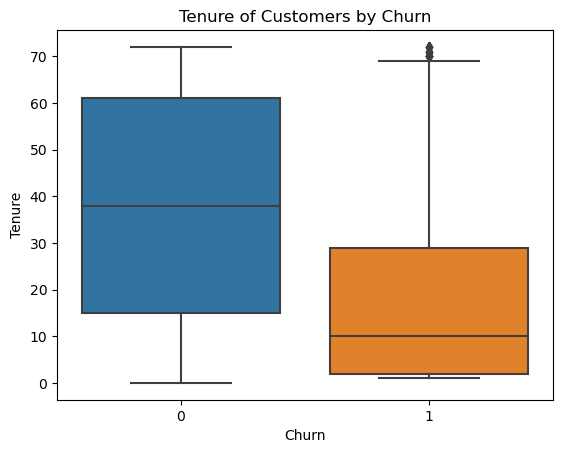

In [13]:
import seaborn as sns

sns.boxplot(x='churn_encoded', y='tenure', data=df)
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure of Customers by Churn')
plt.show()

###### mann whitney

In [14]:
import scipy.stats as stats

# Separate tenure values for churned and non-churned customers
tenure_churned = df[df['churn_encoded'] == 1]['tenure']
tenure_non_churned = df[df['churn_encoded'] == 0]['tenure']

# Perform Mann-Whitney U test
statistic, p_value = stats.mannwhitneyu(tenure_churned, tenure_non_churned)

# Display the test statistic and p-value
print("Mann-Whitney U test statistic:", statistic)
print("P-value:", p_value)

Mann-Whitney U test statistic: 2515538.0
P-value: 2.419635517951866e-208
